<a href="https://colab.research.google.com/github/MichalSlowakiewicz/Machine-Learning/blob/master/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Understanding Splitting Criteria in CART for Regression**
---------------------

In this assignment, you will explore three common formulations of the splitting criterion used in **CART (Classification and Regression Trees)** for **regression problems**:

1. **Local RSS Minimization**  
2. **RSS Gain Maximization**  
3. **Total RSS Minimization**

You will investigate whether any of these criteria are equivalent, and you will design an experiment to determine which criterion is actually employed in a standard implementation such as **scikit-learn’s DecisionTreeRegressor**.



## **The Problem**

Many treatments of CART for regression describe the split selection process in different ways. Below are three frequently cited formulations. Suppose we have a dataset with features $X$ and target $y$, and we seek to choose a feature $X_j$ and a threshold $t$ to split the data into two regions $R_1(X_j, t)$ and $R_2(X_j, t)$. Denote by $\bar{y}_{R_m}$ the mean of targets within region $R_m$.

1. **Local RSS Minimization**  
   We select the feature and threshold that minimize the **sum of squared errors** in the two resulting child nodes:
   $$
   (X_j^*, t^*) = \arg\min_{X_j, t} \sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2.
   $$

2. **RSS Gain Maximization**  

   It is also a local method, looking only at a parent and two child nodes.

   We select the feature and threshold that maximize the **reduction** in RSS, computed by subtracting the RSS of the two child nodes from the RSS in the parent node:
   $$
   (X_j^*, t^*) = \arg\max_{X_j, t} \Bigl\{
   \underbrace{\sum_{i : x_i \in \text{Parent}} (y_i - \bar{y})^2}_{\text{Parent RSS}}
   \;-\;
   \underbrace{\sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2}_{\text{Children RSS}}
   \Bigr\}.
   $$

3. **Total RSS Minimization**  
   For a dataset $\{(x_i, y_i)\}_{i=1}^N$ with features $X$ and target $y$, let $T$ be the current tree.

   For any split on feature $X_j$ at threshold $t$, define $T(X_j, t)$ as the new tree obtained by splitting one leaf of $T$ into two leaves $R_1(X_j, t)$ and $R_2(X_j, t)$.
   
   Let $\mathrm{Leaves}(T(X_j, t))$ be the set of all leaf indices in this new tree. For each leaf $m \in \mathrm{Leaves}(T(X_j, t))$, define:
   $$
   R_m = \{\, i \,\mid\, x_i \text{ ends in leaf } m\}.
   $$

   $R_m$ set collects all data indices $i$ whose feature vector $x_i$ is classified into the leaf node $m$ when passed through the tree $T(X_j,t)$. In other words, each leaf node $m$ in $T(X_j, t)$ corresponds to a unique path of splits, and any data point $x_i$ that follows that path is assigned to the leaf $m$; hence, it belongs to $R_m$.

   $R_m$ sets for all leafs $m \in \mathrm{Leaves}(T(X_j, t))$ define a partition of all indices.

   Then the objective of **minimizing total Residual Sum of Squares (total RSS)** is stated as:
   $$
   (X_j^*, t^*) = \arg\min_{(X_j, t)} \sum_{m \in \mathrm{Leaves}(T(X_j, t))}
   \sum_{i \in R_m} \Bigl(y_i - \overline{y}_{R_m}\Bigr)^2,
   $$
   where
   $$
   \overline{y}_{R_m} = \frac{1}{\lvert R_m \rvert}
   \sum_{i \in R_m} y_i
   $$
   is the mean response in leaf $m$.


## **Research Questions**

1. **Equivalence Analysis**  
   Determine whether the above formulations are equivalent or if they can yield different split choices. Specifically:
   - Are *local RSS minimization* and *RSS gain maximization* equivalent?
   - Does *total RSS minimization* coincide with either of these two, or is it distinct?
   
2. **Empirical Experiment**  
   Design and conduct a Python experiment to determine which of these formulations is implemented in `scikit-learn` in `DecisionTreeRegressor`. Present numerical results and plots to support your conclusion.


## **Tasks & Deliverables**

1. **Formulation Analysis**  
   - Compare *local RSS minimization*, *RSS gain maximization*, and *total RSS minimization*.
   - If you find that any pair of formulations is equivalent, provide a concise proof.  
   - If you find that they differ, construct a counterexample.

2. **Empirical Verification**  
   - Create a small artificial dataset and train a `DecisionTreeRegressor` from `scikit-learn`.
   - The dataset must be designed in a way that uniquely identifies the formulation used. Provide a short code snippet and a plot or table to support your conclusion.

3. **Report**  
   - Summarize your theoretical insights and empirical findings in a **Colab notebook**.
   - Include the relevant proofs, code, discussion, and conclusions.
   - Place the notebook in your **GitHub repository** for this course, add a link to it in your README.md and add an **“Open in Colab”** badge in the notebook so it can be launched directly.



**1) Are local RSS minimization and RSS gain maximization equivalent?**

**2) Does total RSS minimization coincide with either of these two, or is it distinct?**

Metody *local RSS minimization* oraz *RSS gain maximization* nie są sobie równoważne, natomiast *total RSS minimization* oraz *RSS gain maximization* są sobie równoważne.

1) W poniższym punkcie 2) pokażemy, że *total RSS minimization* oraz *RSS gain maximization* są sobie równoważne. Skorzystamy z tej wiedzy, zatem wystarczy pokazać, iż *local RSS minimization* oraz *RSS gain maximization* nie są sobie równoważne, i wtedy automatycznie dostaniemy z 2), że *local RSS minimization* oraz *total RSS minimization* nie są równoważne. Wskażemy kontrprzykład:

Wprowadźmy ograniczenia na nasze drzewo niech maksymalna liczba liści to 3 (max_leaf_nodes = 3). Niech X = {1, 2, 3, 4, 5, 6, 7}, y = {-1, 0, 130, 131, 140, 141, 145}. *Local RSS minimization* wybierze pierwszy podział w X = 2.5, a *total RSS minimization* także w tym samym miejscu: X = 2.5. Z powodu ograniczenia (max_leaf_nodes = 3) możemy dokonać jeszcze tylko jednego podziału. Po podziale mamy 2 podzbiory: X_1 = {1, 2} (i odpowiadające mu y_1 = {-1, 0}) oraz X_2 = {3, 4, 5, 6, 7} (i odpowiadające mu y_2 = {130, 131, 140, 141, 145}).Metoda *local RSS minimization* dokona podziału w punkcie X = 1.5, gdyż wtedy uzyskana suma RSS "dzieci" będzie wynosiła zero, gdyż "dzieci" będą zawierały tylko po jednej wartości X. Natomiast, *total RSS minimization* wybierze podział w X = 4.5, gdyż właśnie w ten sposób zostanie zminimalizowany całkowity RSS (w grupie {130, 131} błąd wyniesie 0.25, a w grupie {140, 141, 145} błąd wyniesie 4.67; inne podziały będą generowały wyższe poziomy łącznego RSS nowych liści). Widzimy teraz, iż dla obu tych metod podziały zostały dokonane w różnych punktach, co dowodzi brak równoważności tych metod.


2) Pokażemy, że *total RSS minimization* jest równoważna z *RSS gain maximization*. Załóżmy, że jesteśmy w procesie rozwijania drzewa i aktualnia posiadamy drzewo T. *Total RSS minimization* będzie chciał minimializować łączny RSS na nowych liściach. Jako, że ustaliliśmy, iż aktualnie mamy drzewo T, to minimizalizacja łącznego RSS na nowych liściach jest równoważna z minimalizacją wyrażenia:

*-łączne RSS liści drzewa T + łączne RSS nowych liści*,

co jest równoważne z maksymalizacją wyrażenia:

*łączne RSS liści drzewa T - łączne RSS nowych liści*,

co jest równoważne z metodą maksymalizacji *RSS gain*, gdyż zachodzi *RSS i-tego liścia drzewa T - RSS nowych liści i-tego liścia* = *RSS gain dla i-tego liścia*. Zatem metody *RSS gain maximization* oraz *total RSS minimization* są równoważne.  





**Metoda używana w sklearn**

Metoda zaimplementowana w bibliotece *scikit-learn* daje takie same rezultaty jak *total RSS Minimization* - dla przykładu z podpunktu 1) podział w X = 2.5 i X = 3.5. Można zatem stwierdzić, iż *scikit-learn* korzysta z metody równoważnej *total RSS Minimization*. Poniżej zamieszono kod obrazujący jak wygląda drzewo decyzyjne stworzone przez sklearn dla danych z 1).

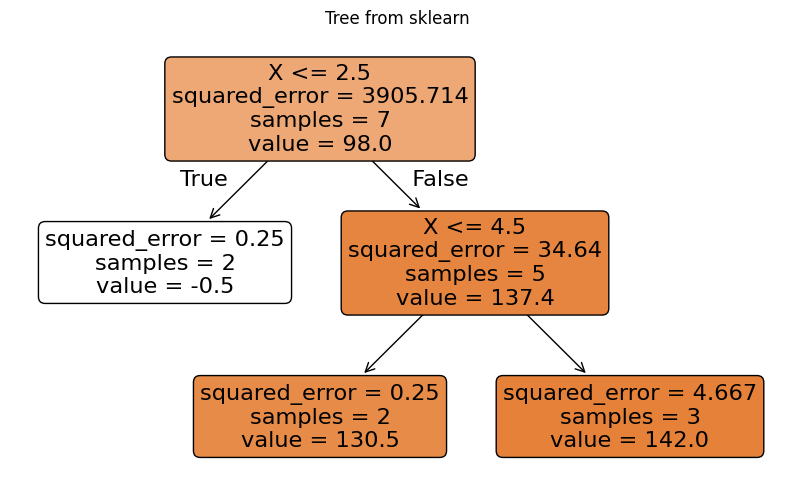

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# let's analyze tree with max_leaf_nodes = 3

# creating a dataset from 1)
X = np.array([1, 2, 3, 4, 5, 6, 7]).reshape(-1, 1)
y = np.array([-1, 0, 130, 131, 140, 141, 145])

# fitting DecisionTreeRegressor with max_leaf_nodes=3 to see splits
dt = DecisionTreeRegressor(max_leaf_nodes=3)
dt.fit(X, y)

# plotting decision tree
plt.figure(figsize=(10, 6))
plot_tree(dt, filled=True, feature_names=["X"], rounded=True)
plt.title('Tree from sklearn')
plt.show()